In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel(r'C:\Users\SH2\Downloads\archive (16)\startup-expansion.xlsx')

In [5]:
df.head(10)

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue
0,1,Peoria,Arizona,Region 2,Old,2601,48610
1,2,Midland,Texas,Region 2,Old,2727,45689
2,3,Spokane,Washington,Region 2,Old,2768,49554
3,4,Denton,Texas,Region 2,Old,2759,38284
4,5,Overland Park,Kansas,Region 2,Old,2869,59887
5,6,Yonkers,New York,Region 1,Old,3080,53827
6,7,Birmingham,Alabama,Region 1,Old,3110,60338
7,8,Antioch,California,Region 2,Old,2593,19569
8,9,Worcester,Massachusetts,Region 1,Old,2675,59840
9,10,Rochester,New York,Region 1,Old,2984,64906


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Store ID         150 non-null    int64 
 1   City             150 non-null    object
 2   State            150 non-null    object
 3   Sales Region     150 non-null    object
 4   New Expansion    150 non-null    object
 5   Marketing Spend  150 non-null    int64 
 6   Revenue          150 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 8.3+ KB


In [12]:
df.shape

(150, 7)

## Cleaning Data

In [9]:
df.isnull().sum() # No Null values

Store ID           0
City               0
State              0
Sales Region       0
New Expansion      0
Marketing Spend    0
Revenue            0
dtype: int64

In [10]:
df.duplicated().sum() # No duplicate rows 

0

In [11]:
df['City'].unique()

array(['Peoria', 'Midland', 'Spokane', 'Denton', 'Overland Park',
       'Yonkers', 'Birmingham', 'Antioch', 'Worcester', 'Rochester',
       'Rialto', 'Santa Maria', 'Las Cruces', 'Jackson', 'Hillsboro',
       'Temecula', 'Tallahassee', 'Fontana', 'Kent', 'Broken Arrow',
       'Concord', 'Modesto', 'Montgomery', 'Burbank', 'Elk Grove',
       'Port St. Lucie', 'Elizabeth', 'Salt Lake City', 'Waco', 'Edison',
       'Boulder', 'Grand Rapids', 'Tyler', 'Charleston', 'Huntsville',
       'Pearland', 'Inglewood', 'Oxnard', 'Miramar', 'Cape Coral',
       'Syracuse', 'Newport News', 'Lewisville', 'Carrollton',
       'San Bernardino', 'Pasadena', 'Roseville', 'Murrieta',
       'San Angelo', 'Olathe', 'Akron', 'Fullerton', 'Manchester',
       'Everett', 'West Covina', 'Thornton', 'Hampton', 'Waterbury',
       'Ventura', 'Davenport', 'Columbia', 'Simi Valley', 'Richmond',
       'Little Rock', 'El Cajon', 'Santa Clara', 'Oceanside', 'Davie',
       'Lakeland', 'Centennial', 'Lowell', 'O

In [13]:
df['City'].nunique()

149

In [15]:
df['City'].value_counts()

Rochester        2
Killeen          1
Wichita Falls    1
Naperville       1
Clovis           1
                ..
Akron            1
Fullerton        1
Manchester       1
Everett          1
Thousand Oaks    1
Name: City, Length: 149, dtype: int64

In [16]:
df['State'].value_counts()

California        40
Texas             17
Florida           12
Washington         7
Colorado           5
Illinois           5
Georgia            4
Alabama            4
Connecticut        4
New Jersey         4
Arizona            3
Tennessee          3
Iowa               3
Michigan           3
South Carolina     3
Utah               3
Massachusetts      3
Kansas             3
New York           3
Louisiana          2
North Carolina     2
Ohio               2
Virginia           2
Oregon             2
Mississippi        1
New Mexico         1
Arkansas           1
New Hampshire      1
Oklahoma           1
Montana            1
Indiana            1
South Dakota       1
Minnesota          1
Wisconsin          1
Rhode Island       1
Name: State, dtype: int64

In [17]:
df['State'].nunique()

35

In [20]:
df['Sales Region'].unique()

array(['Region 2', 'Region 1'], dtype=object)

In [22]:
df['New Expansion'].unique()

array(['Old', 'New'], dtype=object)

### Exploring Numeric Data

In [25]:
df[['Marketing Spend','Revenue']].describe().round(2)

,Marketing Spend,Revenue
count,150.00,150.00
mean,2893.15,39301.43
std,367.86,15465.75
min,1811.00,15562.00
25%,2662.25,21113.50
50%,2898.00,42993.00
75%,3111.50,51145.50
max,3984.00,68828.00


## Creating additional columns 

In [27]:
df['profit'] = df['Revenue'] - df['Marketing Spend']
df.head()

,Store ID,City,State,Sales Region,New Expansion,Marketing Spend,Revenue,profit
0,1,Peoria,Arizona,Region 2,Old,2601,48610,46009
1,2,Midland,Texas,Region 2,Old,2727,45689,42962
2,3,Spokane,Washington,Region 2,Old,2768,49554,46786
3,4,Denton,Texas,Region 2,Old,2759,38284,35525
4,5,Overland Park,Kansas,Region 2,Old,2869,59887,57018


## Analyze the data

In [38]:
# first q1 what is the first ten cities have the most profit
df.groupby('City').max().nlargest(10,'profit')['profit']

City
Little Rock      66388
Grand Rapids     62667
Oxnard           61984
Rochester        61922
Fontana          59942
Brownsville      59473
Providence       59146
Birmingham       57228
Worcester        57165
Overland Park    57018
Name: profit, dtype: int64

In [39]:
df.groupby(['City','State']).min().nsmallest(10,'profit')

,,Store ID,Sales Region,New Expansion,Marketing Spend,Revenue,profit
City,State,,,,,,
Everett,Washington,54,Region 2,Old,3129,15562,12433
Wichita Falls,Texas,97,Region 2,Old,2846,15735,12889
Lewisville,Texas,43,Region 2,Old,2607,16029,13422
Ventura,California,59,Region 2,Old,3228,16652,13424
Temecula,California,16,Region 2,Old,2795,16690,13895
Murrieta,California,48,Region 2,Old,2344,16372,14028
Rialto,California,11,Region 2,Old,2541,16860,14319
Manchester,New Hampshire,53,Region 1,Old,2374,17006,14632
Green Bay,Wisconsin,134,Region 1,Old,3586,18454,14868


<AxesSubplot:>

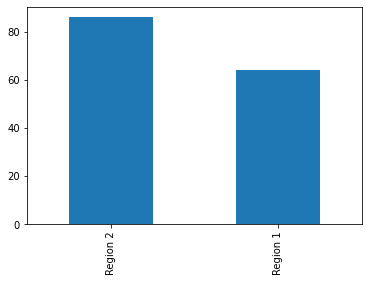

In [45]:
df['Sales Region'].value_counts().plot.bar()

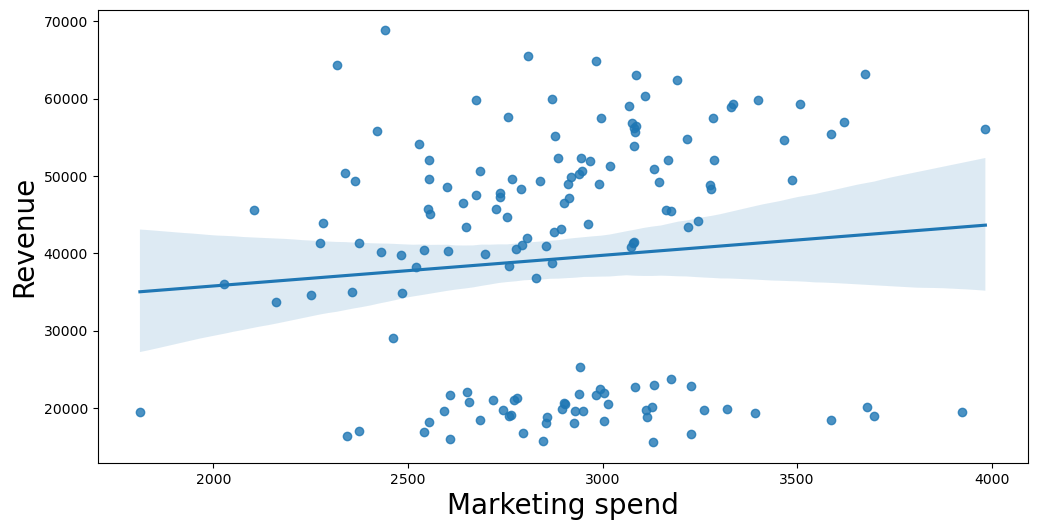

In [49]:
plt.figure(figsize=(12,6),dpi =100)
sns.regplot(x='Marketing Spend', y ='Revenue',data = df)
plt.xlabel('Marketing spend',size=20)
plt.ylabel('Revenue',size=20)
plt.show()

In [54]:
df['State'].unique()

array(['Arizona', 'Texas', 'Washington', 'Kansas', 'New York', 'Alabama',
       'California', 'Massachusetts', 'New Mexico', 'Mississippi',
       'Oregon', 'Florida', 'Oklahoma', 'New Jersey', 'Utah', 'Colorado',
       'Michigan', 'South Carolina', 'Virginia', 'Ohio', 'New Hampshire',
       'Connecticut', 'Iowa', 'Arkansas', 'Tennessee', 'North Carolina',
       'Georgia', 'Illinois', 'Montana', 'Indiana', 'South Dakota',
       'Louisiana', 'Minnesota', 'Wisconsin', 'Rhode Island'],
      dtype=object)

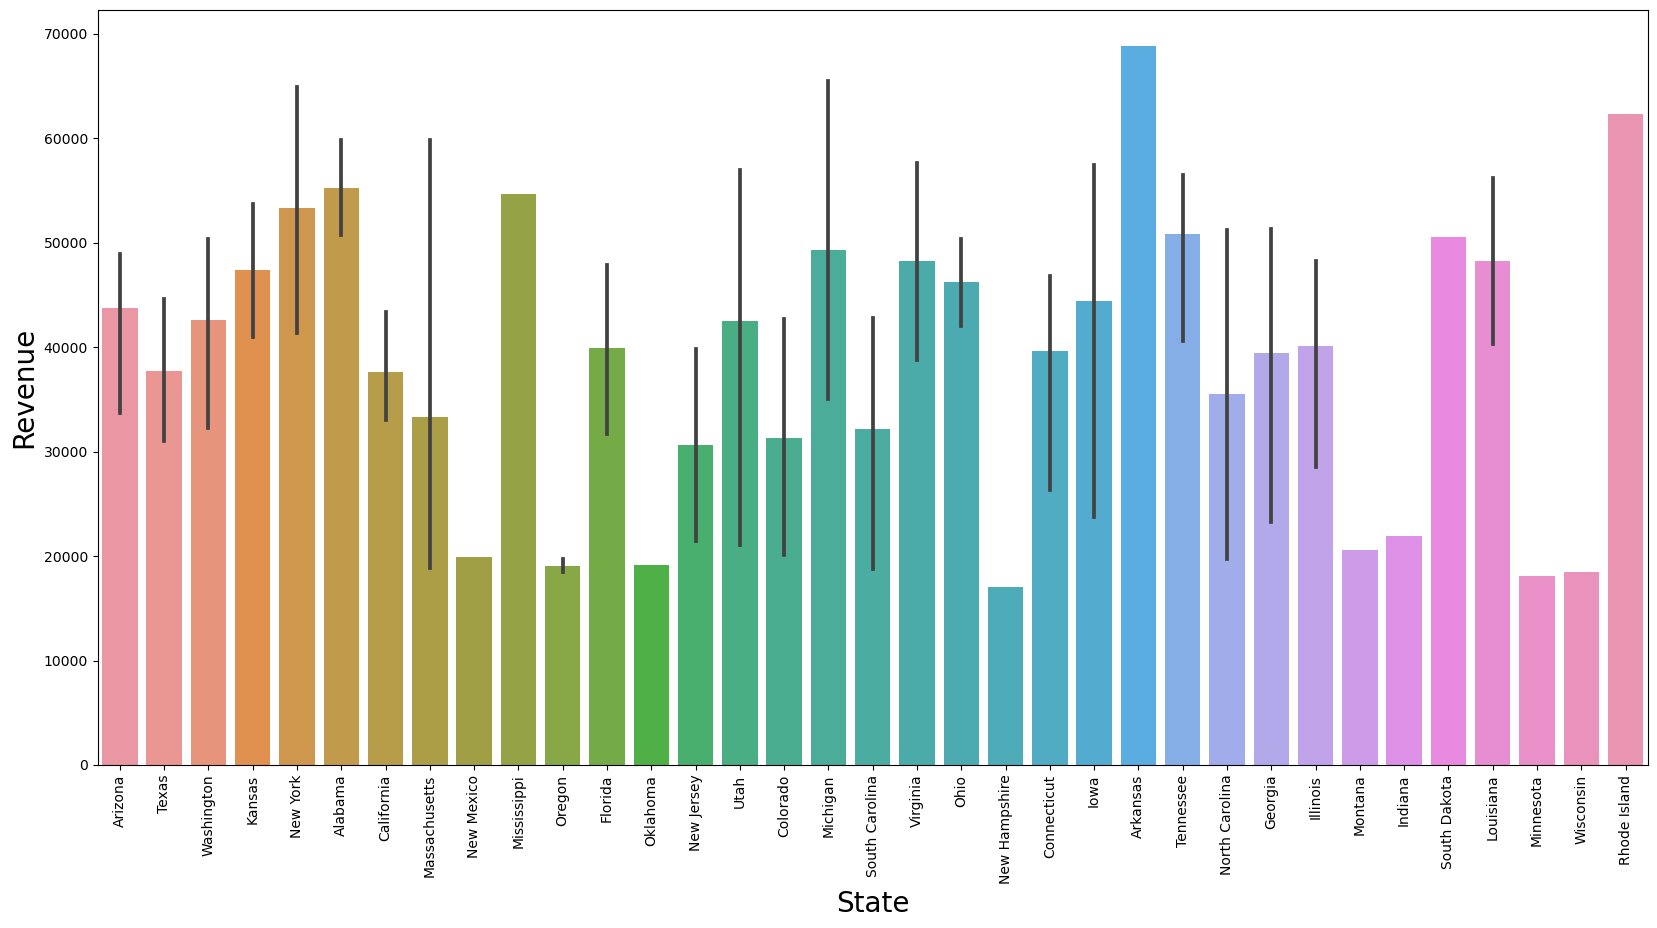

In [60]:
plt.figure(figsize=(20,10),dpi=100)
sns.barplot(x='State',y ='Revenue',data=df)
plt.xticks(rotation = 90)
plt.xlabel('State',size=20)
plt.ylabel('Revenue',size=20)
plt.show()

Text(0.5, 0, 'Profit')

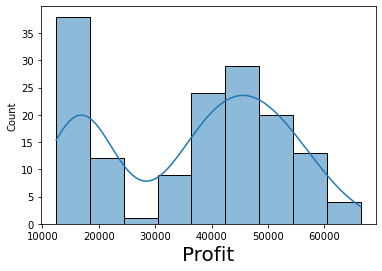

In [67]:
sns.histplot(df['profit'],kde=True)
plt.xlabel('Profit',size=20)

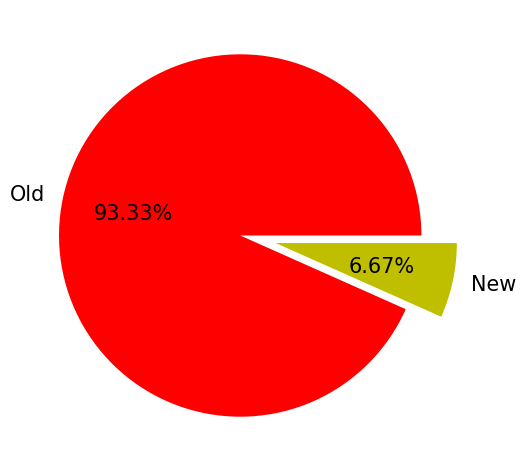

In [92]:
plt.figure(figsize=(12,6),dpi =100)
count_old = df[df['New Expansion'] =='Old'].count()
count_of_new = df[df['New Expansion'] =='New'].count()
data = [140,10]
labels =['Old','New']
colors =['red','y']
textprops = {"fontsize":15}
explode =[0,.2]
plt.pie(data,labels =labels, autopct = "%0.2f%%",colors =colors,textprops =textprops,explode =explode)
plt.show()